In [1]:
# logistic regression
# first implement a basic model


In [13]:
# For the liblinear solver: l1, l2
# For the saga solver: l1, l2, elasticnet
# For the newton-cg solver: l2
# For the lbfgs solver: l2

In [1]:
import dill

In [2]:
dill.load_session("PB24_WP.db")

In [39]:
dill.dump_session("PB24_WP.db")

In [3]:
import time
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, f1_score
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from tabulate import tabulate
import itertools

In [4]:
X_nt = pd.read_csv("C:\Aniruddh\Python\Jupyter\RCC\CSV FILES\Cleaned data\RCC_non_test_set.csv", index_col = 0)
X_t = pd.read_csv("C:\Aniruddh\Python\Jupyter\RCC\CSV FILES\Cleaned data\RCC_test_set.csv", index_col = 0)
X_nt = X_nt.drop(index = 83)
X = pd.concat([X_nt, X_t])
y = X.pop("RECURRENCE")
y_nt = X_nt.pop("RECURRENCE")
y_t = X_t.pop("RECURRENCE")

In [5]:
imputer_r = SimpleImputer(strategy = 'median', fill_value = 0)
scaler_r = StandardScaler()
X_nt_s_i = scaler_r.fit_transform(imputer_r.fit_transform(X_nt))
X_t_s_i = scaler_r.transform(imputer_r.transform(X_t))

In [6]:
# Assuming X contains the features and y contains the target variable

# Split the data into training and testing sets
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the logistic regression model
log_reg = LogisticRegression(random_state = 42)

# Fit the model on the training data
log_reg.fit(X_nt_s_i, y_nt)

# Predict on the test data
y_pred = log_reg.predict(X_t_s_i)

# Print classification report
print(classification_report(y_t, y_pred))

              precision    recall  f1-score   support

           0       0.89      0.97      0.92       183
           1       0.33      0.12      0.17        26

    accuracy                           0.86       209
   macro avg       0.61      0.54      0.55       209
weighted avg       0.82      0.86      0.83       209



Classification Report on Test Set:
              precision    recall  f1-score   support

     Class 0       0.89      0.97      0.92       183
     Class 1       0.33      0.12      0.17        26

    accuracy                           0.86       209
   macro avg       0.61      0.54      0.55       209
weighted avg       0.82      0.86      0.83       209

Confusion Matrix:
+-----------+-----------+
|   Class 0 |   Class 1 |
+===========+===========+
|       177 |         6 |
+-----------+-----------+
|        23 |         3 |
+-----------+-----------+


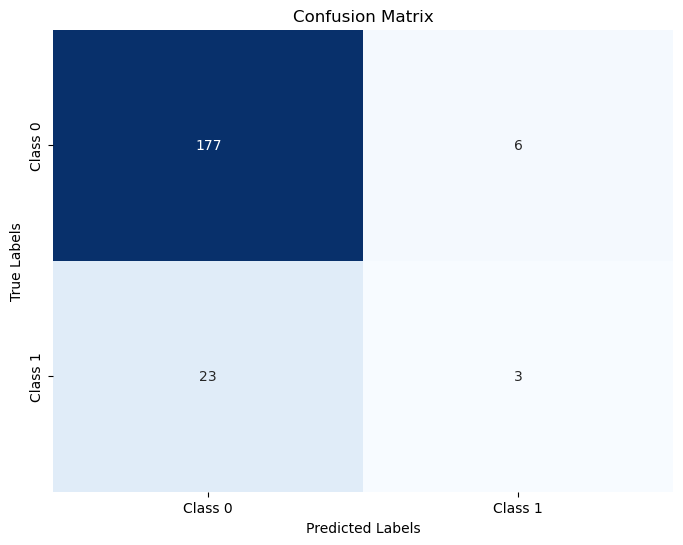

In [7]:
model_test(log_reg)

In [8]:
param_grid = {
    'penalty': ['l1', 'l2'],  # Regularization penalty
    'C': [0.001, 0.01, 0.1, 1, 10, 100],  # Regularization strength
    'solver': ['liblinear', 'saga'],  # Optimization algorithm
    'class_weight': [None, 'balanced']  # Class weights
}

In [9]:
def grid_searcher(param_grid, pipeline, scoring, X_nt = X_nt_s_i, y_nt = y_nt, cv = 10, verbose = 0):
    tic = time.time()
    grid_search = GridSearchCV(estimator = pipeline, param_grid = param_grid, cv = cv, scoring = scoring, n_jobs = -1, verbose = verbose)
    grid_search.fit(X_nt, y_nt)
    best_params = grid_search.best_params_
    print("Best Hyperparameters:", best_params)
    best_model = grid_search.best_estimator_
    toc = time.time()
    print("Time Taken:", toc - tic)
    return best_params, best_model

In [10]:
def model_test(best_estimator, X_test = X_t_s_i, y_test = y_t, suppress_output = False, small_output = True):
    y_pred_test = best_estimator.predict(X_test)
    class_names = ['Class 0', 'Class 1']
    report_test = classification_report(y_test, y_pred_test, target_names = class_names)
    cm = confusion_matrix(y_test, y_pred_test)
    cm_table = tabulate(cm, headers=class_names, tablefmt='grid')
    if not(suppress_output):
        print("Classification Report on Test Set:")
        print(report_test)
        cm_table = tabulate(cm, headers=class_names, tablefmt='grid')
        print("Confusion Matrix:")
        print(cm_table)
        plt.figure(figsize = (8, 6))
        sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False, xticklabels=class_names, yticklabels=class_names)
        plt.xlabel('Predicted Labels')
        plt.ylabel('True Labels')
        plt.title('Confusion Matrix')
        plt.show()
    if small_output:
        return report_test, cm_table, f1_score(y_test, y_pred_test)

Best Hyperparameters: {'C': 0.1, 'class_weight': 'balanced', 'penalty': 'l1', 'solver': 'liblinear'}
Time Taken: 7.648252725601196
Classification Report on Test Set:
              precision    recall  f1-score   support

     Class 0       0.95      0.67      0.78       183
     Class 1       0.24      0.73      0.36        26

    accuracy                           0.67       209
   macro avg       0.59      0.70      0.57       209
weighted avg       0.86      0.67      0.73       209

Confusion Matrix:
+-----------+-----------+
|   Class 0 |   Class 1 |
+===========+===========+
|       122 |        61 |
+-----------+-----------+
|         7 |        19 |
+-----------+-----------+


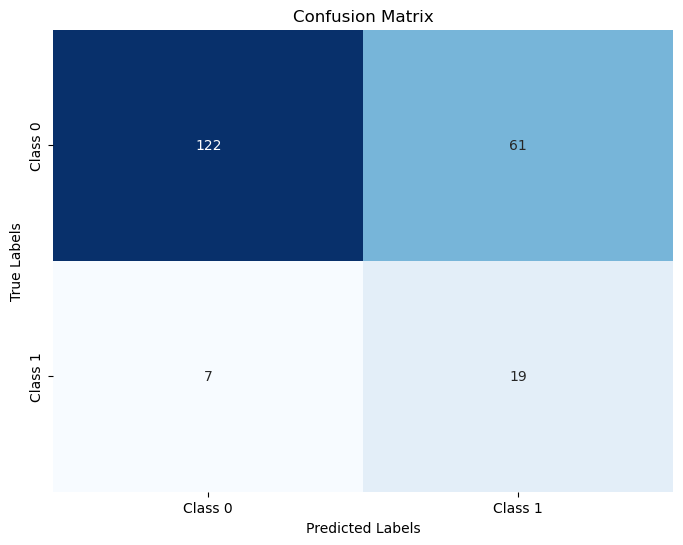

('              precision    recall  f1-score   support\n\n     Class 0       0.95      0.67      0.78       183\n     Class 1       0.24      0.73      0.36        26\n\n    accuracy                           0.67       209\n   macro avg       0.59      0.70      0.57       209\nweighted avg       0.86      0.67      0.73       209\n',
 '+-----------+-----------+\n|   Class 0 |   Class 1 |\n+===========+===========+\n|       122 |        61 |\n+-----------+-----------+\n|         7 |        19 |\n+-----------+-----------+',
 0.3584905660377359)

In [11]:
lr1 = LogisticRegression(random_state = 42)
best_params, best_model = grid_searcher(param_grid, lr1, 'recall')
model_test(best_model)

Best Hyperparameters: {'C': 1, 'class_weight': 'balanced', 'penalty': 'l1', 'solver': 'liblinear'}
Time Taken: 1.6963226795196533
Classification Report on Test Set:
              precision    recall  f1-score   support

     Class 0       0.93      0.72      0.81       183
     Class 1       0.24      0.62      0.34        26

    accuracy                           0.71       209
   macro avg       0.58      0.67      0.58       209
weighted avg       0.84      0.71      0.75       209

Confusion Matrix:
+-----------+-----------+
|   Class 0 |   Class 1 |
+===========+===========+
|       132 |        51 |
+-----------+-----------+
|        10 |        16 |
+-----------+-----------+


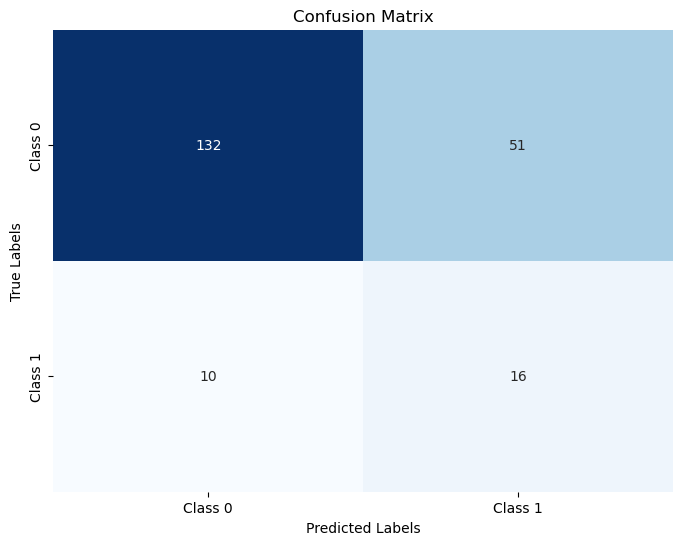

('              precision    recall  f1-score   support\n\n     Class 0       0.93      0.72      0.81       183\n     Class 1       0.24      0.62      0.34        26\n\n    accuracy                           0.71       209\n   macro avg       0.58      0.67      0.58       209\nweighted avg       0.84      0.71      0.75       209\n',
 '+-----------+-----------+\n|   Class 0 |   Class 1 |\n+===========+===========+\n|       132 |        51 |\n+-----------+-----------+\n|        10 |        16 |\n+-----------+-----------+',
 0.3440860215053763)

In [12]:
lr1 = LogisticRegression(random_state = 42)
best_params, best_model = grid_searcher(param_grid, lr1, 'f1')
model_test(best_model)

In [14]:
param_grid = {
    'penalty': ['l1', 'l2', 'elasticnet'],  # Regularization penalty
    'C': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000],  # Regularization strength
    'solver': ['saga'],  # Optimization algorithm, 'liblinear',  'newton-cg', 'lbfgs'
    'class_weight': [None, 'balanced', {0: 1, 1: 5}, {0: 1, 1: 7}, {0: 1, 1: 8}, {0: 1, 1: 10}],  # Class weights
    'l1_ratio': [0, 0.25, 0.5, 0.75, 1.0], # L1 ratio for elasticnet penalty
    'max_iter': [100, 200, 300, 400, 500]
}

Best Hyperparameters: {'C': 0.1, 'class_weight': {0: 1, 1: 5}, 'l1_ratio': 0.25, 'max_iter': 200, 'penalty': 'elasticnet', 'solver': 'saga'}
Time Taken: 216.14261317253113
Classification Report on Test Set:
              precision    recall  f1-score   support

     Class 0       0.93      0.77      0.84       183
     Class 1       0.26      0.58      0.36        26

    accuracy                           0.75       209
   macro avg       0.60      0.67      0.60       209
weighted avg       0.84      0.75      0.78       209

Confusion Matrix:
+-----------+-----------+
|   Class 0 |   Class 1 |
+===========+===========+
|       141 |        42 |
+-----------+-----------+
|        11 |        15 |
+-----------+-----------+


C:\Users\aniru\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


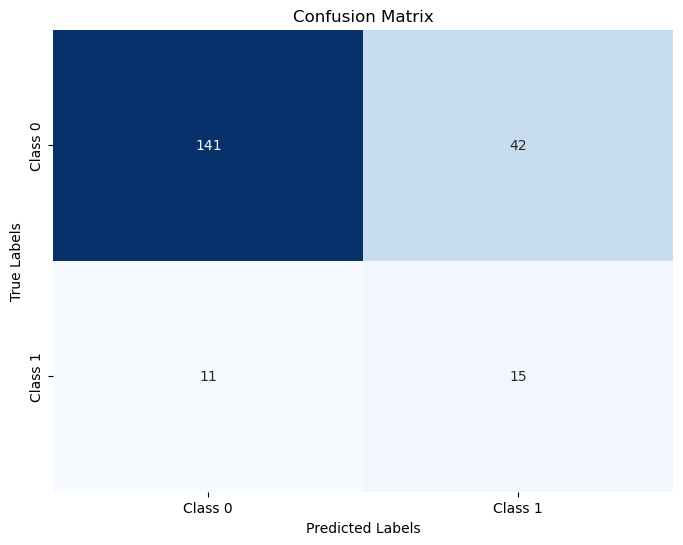

('              precision    recall  f1-score   support\n\n     Class 0       0.93      0.77      0.84       183\n     Class 1       0.26      0.58      0.36        26\n\n    accuracy                           0.75       209\n   macro avg       0.60      0.67      0.60       209\nweighted avg       0.84      0.75      0.78       209\n',
 '+-----------+-----------+\n|   Class 0 |   Class 1 |\n+===========+===========+\n|       141 |        42 |\n+-----------+-----------+\n|        11 |        15 |\n+-----------+-----------+',
 0.3614457831325302)

In [15]:
lr1 = LogisticRegression(random_state = 42)
best_params, best_model = grid_searcher(param_grid, lr1, 'f1')
model_test(best_model)

In [16]:
param_grid = {
    'penalty': ['l2'],  # Regularization penalty
    'C': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000],  # Regularization strength
    'solver': ['saga', 'liblinear',  'newton-cg', 'lbfgs'],  # Optimization algorithm
    'class_weight': [None, 'balanced', {0: 1, 1: 5}, {0: 1, 1: 7}, {0: 1, 1: 8}, {0: 1, 1: 10}],  # Class weights
    # 'l1_ratio': [0, 0.25, 0.5, 0.75, 1.0], # L1 ratio for elasticnet penalty
    'max_iter': [100, 200, 300, 400, 500]
}

Best Hyperparameters: {'C': 0.1, 'class_weight': {0: 1, 1: 5}, 'max_iter': 100, 'penalty': 'l2', 'solver': 'saga'}
Time Taken: 22.01758623123169
Classification Report on Test Set:
              precision    recall  f1-score   support

     Class 0       0.93      0.76      0.83       183
     Class 1       0.25      0.58      0.35        26

    accuracy                           0.74       209
   macro avg       0.59      0.67      0.59       209
weighted avg       0.84      0.74      0.77       209

Confusion Matrix:
+-----------+-----------+
|   Class 0 |   Class 1 |
+===========+===========+
|       139 |        44 |
+-----------+-----------+
|        11 |        15 |
+-----------+-----------+


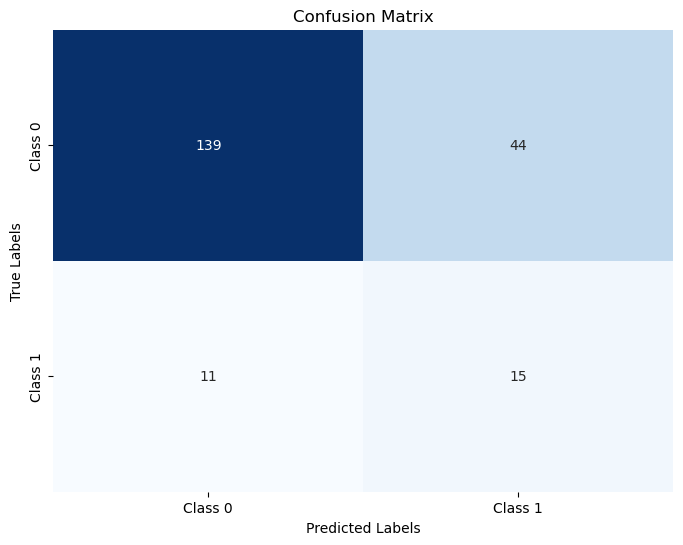

('              precision    recall  f1-score   support\n\n     Class 0       0.93      0.76      0.83       183\n     Class 1       0.25      0.58      0.35        26\n\n    accuracy                           0.74       209\n   macro avg       0.59      0.67      0.59       209\nweighted avg       0.84      0.74      0.77       209\n',
 '+-----------+-----------+\n|   Class 0 |   Class 1 |\n+===========+===========+\n|       139 |        44 |\n+-----------+-----------+\n|        11 |        15 |\n+-----------+-----------+',
 0.3529411764705882)

In [17]:
lr1 = LogisticRegression(random_state = 42)
best_params, best_model = grid_searcher(param_grid, lr1, 'f1')
model_test(best_model)

In [18]:
def make_lr_pipeline():
    model = LogisticRegression(random_state = 42)
    imputer = SimpleImputer(strategy = 'median')
    scaler = StandardScaler()
    pipeline = Pipeline([
        ('imputer', imputer),
        ('scaler', scaler),
        ('model', model)
    ])
    return pipeline

In [19]:
def generate_permutations():
    imputation_values = [0, 1]
    permutations = itertools.product(imputation_values, repeat=6)
    # permutations = [np.random.choice(imputation_values, size = 6) for _ in range(num_samples)]
    return permutations

In [29]:
def lr_massive_gridsearch():
    template = ['M', 'GRADE', 'T', 'IVC INV', 'MAX DIA']
    candidates = np.array(['AGE', 'MONTHS', 'HEMATURIA', 'APPROACH_1', 'APPROACH_2', 'N'])
    # we first create a dictionary, which will store
    param_grid = {
        'model__penalty': ['l2'],  # Regularization penalty
        'model__C': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000],  # Regularization strength
        'model__solver': ['saga', 'liblinear',  'newton-cg', 'lbfgs'],  # Optimization algorithm
        'model__class_weight': [None, 'balanced', {0: 1, 1: 5}, {0: 1, 1: 7}, {0: 1, 1: 8}, {0: 1, 1: 10}],  # Class weights
        'model__max_iter': [100, 200, 300, 400, 500]
    }
    rows_list = []
    count = 0
    for perm in list(generate_permutations()):
        print(f"Index: {count}")
        new_list = template + list(candidates[list(map(bool, perm))])
        X_train_i = X_nt[new_list]
        X_test_i = X_t[new_list]
        pipeline = make_lr_pipeline()
        best_params, best_model = grid_searcher(param_grid, pipeline, 'f1', X_train_i, cv = 5)
        report_test, cm_table, f1 = model_test(best_model, X_test_i, y_t, True, True)
        dict1 = {'col_list': new_list, 'best_params': best_params, 'best_model': best_model,
                 'report_test': report_test, 'cm_table': cm_table, 'f1': f1}
        rows_list.append(dict1)
        count += 1
        # winsound.Beep(1000, 10000)
        # else:
        #     time.sleep(60)
    df = pd.DataFrame(rows_list)
    return df

In [ ]:
lr_search_df = lr_massive_gridsearch()

In [31]:
lr_search_df

,col_list,best_params,best_model,report_test,cm_table,f1
0,"[M, GRADE, T, IVC INV, MAX DIA]","{'model__C': 100, 'model__class_weight': {0: 1...","(SimpleImputer(strategy='median'), StandardSca...",precision recall f1-score ...,+-----------+-----------+\n| Class 0 | Cla...,0.416667
1,"[M, GRADE, T, IVC INV, MAX DIA, N]","{'model__C': 0.01, 'model__class_weight': {0: ...","(SimpleImputer(strategy='median'), StandardSca...",precision recall f1-score ...,+-----------+-----------+\n| Class 0 | Cla...,0.375000
2,"[M, GRADE, T, IVC INV, MAX DIA, APPROACH_2]","{'model__C': 0.01, 'model__class_weight': {0: ...","(SimpleImputer(strategy='median'), StandardSca...",precision recall f1-score ...,+-----------+-----------+\n| Class 0 | Cla...,0.394737
3,"[M, GRADE, T, IVC INV, MAX DIA, APPROACH_2, N]","{'model__C': 0.01, 'model__class_weight': {0: ...","(SimpleImputer(strategy='median'), StandardSca...",precision recall f1-score ...,+-----------+-----------+\n| Class 0 | Cla...,0.394737
4,"[M, GRADE, T, IVC INV, MAX DIA, APPROACH_1]","{'model__C': 10, 'model__class_weight': {0: 1,...","(SimpleImputer(strategy='median'), StandardSca...",precision recall f1-score ...,+-----------+-----------+\n| Class 0 | Cla...,0.394737
...,...,...,...,...,...,...
59,"[M, GRADE, T, IVC INV, MAX DIA, AGE, MONTHS, H...","{'model__C': 0.01, 'model__class_weight': {0: ...","(SimpleImputer(strategy='median'), StandardSca...",precision recall f1-score ...,+-----------+-----------+\n| Class 0 | Cla...,0.338462
60,"[M, GRADE, T, IVC INV, MAX DIA, AGE, MONTHS, H...","{'model__C': 0.01, 'model__class_weight': {0: ...","(SimpleImputer(strategy='median'), StandardSca...",precision recall f1-score ...,+-----------+-----------+\n| Class 0 | Cla...,0.376471
61,"[M, GRADE, T, IVC INV, MAX DIA, AGE, MONTHS, H...","{'model__C': 10, 'model__class_weight': {0: 1,...","(SimpleImputer(strategy='median'), StandardSca...",precision recall f1-score ...,+-----------+-----------+\n| Class 0 | Cla...,0.347826
62,"[M, GRADE, T, IVC INV, MAX DIA, AGE, MONTHS, H...","{'model__C': 1, 'model__class_weight': {0: 1, ...","(SimpleImputer(strategy='median'), StandardSca...",precision recall f1-score ...,+-----------+-----------+\n| Class 0 | Cla...,0.395062


In [25]:
lr_f1_series = lr_search_df.sort_values(by = 'f1', ascending = False)['f1']
lr_f1_series

39    0.441176
35    0.441176
38    0.434783
37    0.428571
36    0.428571
        ...   
58    0.338462
59    0.338462
26    0.333333
28    0.329412
50    0.288288
Name: f1, Length: 64, dtype: float64

In [26]:
for key, value in lr_f1_series.items():
    print(f"{key}: {value}")

39: 0.4411764705882353
35: 0.4411764705882353
38: 0.43478260869565216
37: 0.42857142857142855
36: 0.42857142857142855
34: 0.42857142857142855
33: 0.4225352112676057
0: 0.41666666666666663
32: 0.41666666666666663
54: 0.40625000000000006
5: 0.4054054054054054
6: 0.4054054054054054
46: 0.4
47: 0.39999999999999997
15: 0.39999999999999997
62: 0.3950617283950617
63: 0.3950617283950617
16: 0.3950617283950617
2: 0.3947368421052631
3: 0.3947368421052631
4: 0.3947368421052631
14: 0.3917525773195876
24: 0.3902439024390244
25: 0.3902439024390244
44: 0.3896103896103896
55: 0.38834951456310673
22: 0.38554216867469876
23: 0.38554216867469876
51: 0.38461538461538464
52: 0.380952380952381
11: 0.38
7: 0.379746835443038
42: 0.3783783783783784
41: 0.37681159420289856
18: 0.3764705882352941
53: 0.3764705882352941
20: 0.3764705882352941
60: 0.3764705882352941
48: 0.375
1: 0.375
43: 0.37499999999999994
49: 0.37383177570093457
10: 0.37254901960784315
21: 0.37209302325581395
57: 0.37037037037037035
12: 0.36734

In [28]:
for key, value in lr_f1_series[:5].items():
    print(f"row = {key}")
    for col in ['col_list', 'report_test', 'cm_table', 'f1', 'best_params']:
        print(lr_search_df.loc[key, col])
    print()

row = 39
['M', 'GRADE', 'T', 'IVC INV', 'MAX DIA', 'AGE', 'APPROACH_1', 'APPROACH_2', 'N']
              precision    recall  f1-score   support

     Class 0       0.93      0.85      0.89       183
     Class 1       0.36      0.58      0.44        26

    accuracy                           0.82       209
   macro avg       0.65      0.71      0.67       209
weighted avg       0.86      0.82      0.84       209

+-----------+-----------+
|   Class 0 |   Class 1 |
+===========+===========+
|       156 |        27 |
+-----------+-----------+
|        11 |        15 |
+-----------+-----------+
0.4411764705882353
{'model__C': 0.1, 'model__class_weight': {0: 1, 1: 5}, 'model__max_iter': 300, 'model__penalty': 'l2', 'model__solver': 'saga'}

row = 35
['M', 'GRADE', 'T', 'IVC INV', 'MAX DIA', 'AGE', 'APPROACH_2', 'N']
              precision    recall  f1-score   support

     Class 0       0.93      0.85      0.89       183
     Class 1       0.36      0.58      0.44        26

    accurac

In [4]:
def lr_massive_gridsearch_1(scoring = 'f1'):
    template = ['M', 'GRADE', 'T', 'IVC INV', 'MAX DIA']
    candidates = np.array(['AGE', 'MONTHS', 'HEMATURIA', 'APPROACH_1', 'APPROACH_2', 'N'])
    param_grid = {
        'model__penalty': ['l2'],  # Regularization penalty
        'model__C': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000],  # Regularization strength
        'model__solver': ['saga', 'liblinear',  'newton-cg', 'lbfgs'],  # Optimization algorithm
        'model__class_weight': [None, 'balanced', {0: 1, 1: 5}, {0: 1, 1: 7}, {0: 1, 1: 8}, {0: 1, 1: 10}],  # Class weights
        'model__max_iter': [100, 200, 300, 400, 500],
        'model__tol': [1e-4, 1e-3, 1e-2],     # Include tolerance for early stopping
    }
    rows_list = []
    count = 0
    for perm in list(generate_permutations()):
        print(f"Index: {count}")
        new_list = template + list(candidates[list(map(bool, perm))])
        X_train_i = X_nt[new_list]
        X_test_i = X_t[new_list]
        pipeline = make_lr_pipeline()
        best_params, best_model = grid_searcher(param_grid, pipeline, 'f1', X_train_i, cv = 5)
        report_test, cm_table, f1 = model_test(best_model, X_test_i, y_t, True, True)
        dict1 = {'col_list': new_list, 'best_params': best_params, 'best_model': best_model,
                 'report_test': report_test, 'cm_table': cm_table, 'f1': f1}
        rows_list.append(dict1)
        count += 1
        # winsound.Beep(1000, 10000)
        # else:
        #     time.sleep(60)
    df = pd.DataFrame(rows_list)
    return df

In [5]:
lr_search_df_1_f1 = lr_massive_gridsearch_1()

Index: 0
Best Hyperparameters: {'model__C': 100, 'model__class_weight': {0: 1, 1: 5}, 'model__max_iter': 400, 'model__penalty': 'l2', 'model__solver': 'saga', 'model__tol': 0.01}
Time Taken: 38.931297302246094
Index: 1
Best Hyperparameters: {'model__C': 0.01, 'model__class_weight': {0: 1, 1: 5}, 'model__max_iter': 100, 'model__penalty': 'l2', 'model__solver': 'liblinear', 'model__tol': 0.0001}
Time Taken: 35.06972408294678
Index: 2
Best Hyperparameters: {'model__C': 0.01, 'model__class_weight': {0: 1, 1: 5}, 'model__max_iter': 100, 'model__penalty': 'l2', 'model__solver': 'liblinear', 'model__tol': 0.0001}
Time Taken: 34.435513973236084
Index: 3
Best Hyperparameters: {'model__C': 1000, 'model__class_weight': {0: 1, 1: 7}, 'model__max_iter': 200, 'model__penalty': 'l2', 'model__solver': 'saga', 'model__tol': 0.01}
Time Taken: 33.40074014663696
Index: 4
Best Hyperparameters: {'model__C': 100, 'model__class_weight': {0: 1, 1: 5}, 'model__max_iter': 500, 'model__penalty': 'l2', 'model__sol

C:\Users\aniru\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


Best Hyperparameters: {'model__C': 1, 'model__class_weight': {0: 1, 1: 7}, 'model__max_iter': 200, 'model__penalty': 'l2', 'model__solver': 'saga', 'model__tol': 0.0001}
Time Taken: 33.353577613830566
Index: 29
Best Hyperparameters: {'model__C': 100, 'model__class_weight': {0: 1, 1: 7}, 'model__max_iter': 400, 'model__penalty': 'l2', 'model__solver': 'saga', 'model__tol': 0.0001}
Time Taken: 28.61352777481079
Index: 30
Best Hyperparameters: {'model__C': 100, 'model__class_weight': {0: 1, 1: 5}, 'model__max_iter': 300, 'model__penalty': 'l2', 'model__solver': 'saga', 'model__tol': 0.0001}
Time Taken: 27.0515296459198
Index: 31
Best Hyperparameters: {'model__C': 100, 'model__class_weight': {0: 1, 1: 5}, 'model__max_iter': 100, 'model__penalty': 'l2', 'model__solver': 'saga', 'model__tol': 0.01}
Time Taken: 27.23433256149292
Index: 32
Best Hyperparameters: {'model__C': 100, 'model__class_weight': {0: 1, 1: 5}, 'model__max_iter': 500, 'model__penalty': 'l2', 'model__solver': 'saga', 'model

C:\Users\aniru\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


Best Hyperparameters: {'model__C': 100, 'model__class_weight': {0: 1, 1: 7}, 'model__max_iter': 200, 'model__penalty': 'l2', 'model__solver': 'saga', 'model__tol': 0.0001}
Time Taken: 26.17161202430725
Index: 58
Best Hyperparameters: {'model__C': 0.01, 'model__class_weight': {0: 1, 1: 5}, 'model__max_iter': 100, 'model__penalty': 'l2', 'model__solver': 'saga', 'model__tol': 0.0001}
Time Taken: 27.26277995109558
Index: 59
Best Hyperparameters: {'model__C': 0.01, 'model__class_weight': {0: 1, 1: 5}, 'model__max_iter': 100, 'model__penalty': 'l2', 'model__solver': 'saga', 'model__tol': 0.0001}
Time Taken: 69.42754554748535
Index: 60


C:\Users\aniru\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


Best Hyperparameters: {'model__C': 1, 'model__class_weight': {0: 1, 1: 7}, 'model__max_iter': 200, 'model__penalty': 'l2', 'model__solver': 'saga', 'model__tol': 0.0001}
Time Taken: 40.588239431381226
Index: 61
Best Hyperparameters: {'model__C': 1, 'model__class_weight': {0: 1, 1: 7}, 'model__max_iter': 200, 'model__penalty': 'l2', 'model__solver': 'saga', 'model__tol': 0.0001}
Time Taken: 27.59586477279663
Index: 62
Best Hyperparameters: {'model__C': 10, 'model__class_weight': {0: 1, 1: 5}, 'model__max_iter': 100, 'model__penalty': 'l2', 'model__solver': 'saga', 'model__tol': 0.01}
Time Taken: 62.05572843551636
Index: 63
Best Hyperparameters: {'model__C': 10, 'model__class_weight': {0: 1, 1: 5}, 'model__max_iter': 100, 'model__penalty': 'l2', 'model__solver': 'saga', 'model__tol': 0.01}
Time Taken: 33.80458474159241


In [6]:
lr_search_df_1_f1

,col_list,best_params,best_model,report_test,cm_table,f1
0,"[M, GRADE, T, IVC INV, MAX DIA]","{'model__C': 100, 'model__class_weight': {0: 1...","(SimpleImputer(strategy='median'), StandardSca...",precision recall f1-score ...,+-----------+-----------+\n| Class 0 | Cla...,0.422535
1,"[M, GRADE, T, IVC INV, MAX DIA, N]","{'model__C': 0.01, 'model__class_weight': {0: ...","(SimpleImputer(strategy='median'), StandardSca...",precision recall f1-score ...,+-----------+-----------+\n| Class 0 | Cla...,0.375000
2,"[M, GRADE, T, IVC INV, MAX DIA, APPROACH_2]","{'model__C': 0.01, 'model__class_weight': {0: ...","(SimpleImputer(strategy='median'), StandardSca...",precision recall f1-score ...,+-----------+-----------+\n| Class 0 | Cla...,0.394737
3,"[M, GRADE, T, IVC INV, MAX DIA, APPROACH_2, N]","{'model__C': 1000, 'model__class_weight': {0: ...","(SimpleImputer(strategy='median'), StandardSca...",precision recall f1-score ...,+-----------+-----------+\n| Class 0 | Cla...,0.350515
4,"[M, GRADE, T, IVC INV, MAX DIA, APPROACH_1]","{'model__C': 100, 'model__class_weight': {0: 1...","(SimpleImputer(strategy='median'), StandardSca...",precision recall f1-score ...,+-----------+-----------+\n| Class 0 | Cla...,0.394737
...,...,...,...,...,...,...
59,"[M, GRADE, T, IVC INV, MAX DIA, AGE, MONTHS, H...","{'model__C': 0.01, 'model__class_weight': {0: ...","(SimpleImputer(strategy='median'), StandardSca...",precision recall f1-score ...,+-----------+-----------+\n| Class 0 | Cla...,0.338462
60,"[M, GRADE, T, IVC INV, MAX DIA, AGE, MONTHS, H...","{'model__C': 1, 'model__class_weight': {0: 1, ...","(SimpleImputer(strategy='median'), StandardSca...",precision recall f1-score ...,+-----------+-----------+\n| Class 0 | Cla...,0.317757
61,"[M, GRADE, T, IVC INV, MAX DIA, AGE, MONTHS, H...","{'model__C': 1, 'model__class_weight': {0: 1, ...","(SimpleImputer(strategy='median'), StandardSca...",precision recall f1-score ...,+-----------+-----------+\n| Class 0 | Cla...,0.345455
62,"[M, GRADE, T, IVC INV, MAX DIA, AGE, MONTHS, H...","{'model__C': 10, 'model__class_weight': {0: 1,...","(SimpleImputer(strategy='median'), StandardSca...",precision recall f1-score ...,+-----------+-----------+\n| Class 0 | Cla...,0.390244


In [11]:
lr_f1_series_1 = lr_search_df_1_f1.sort_values(by = 'f1', ascending = False)['f1']
lr_f1_series_1

39    0.441176
35    0.441176
38    0.434783
37    0.428571
36    0.428571
        ...   
31    0.341463
58    0.338462
59    0.338462
26    0.333333
60    0.317757
Name: f1, Length: 64, dtype: float64

In [8]:
for key, value in lr_f1_series_1_f1[:5].items():
    print(f"row = {key}")
    for col in ['col_list', 'report_test', 'cm_table', 'f1', 'best_params']:
        print(lr_search_df_1_f1.loc[key, col])
    print()

row = 39
['M', 'GRADE', 'T', 'IVC INV', 'MAX DIA', 'AGE', 'APPROACH_1', 'APPROACH_2', 'N']
              precision    recall  f1-score   support

     Class 0       0.93      0.85      0.89       183
     Class 1       0.36      0.58      0.44        26

    accuracy                           0.82       209
   macro avg       0.65      0.71      0.67       209
weighted avg       0.86      0.82      0.84       209

+-----------+-----------+
|   Class 0 |   Class 1 |
+===========+===========+
|       156 |        27 |
+-----------+-----------+
|        11 |        15 |
+-----------+-----------+
0.4411764705882353
{'model__C': 0.1, 'model__class_weight': {0: 1, 1: 5}, 'model__max_iter': 100, 'model__penalty': 'l2', 'model__solver': 'saga', 'model__tol': 0.0001}

row = 35
['M', 'GRADE', 'T', 'IVC INV', 'MAX DIA', 'AGE', 'APPROACH_2', 'N']
              precision    recall  f1-score   support

     Class 0       0.93      0.85      0.89       183
     Class 1       0.36      0.58      0.44 

In [9]:
col_list1 = ['M', 'GRADE', 'T', 'IVC INV', 'MAX DIA', 'AGE', 'APPROACH_1', 'APPROACH_2', 'N']
X_train_1 = X_nt[col_list1]
X_test_1 = X_t[col_list1]

In [ ]:
np.arange()

In [12]:
param_grid1 = {
    'model__penalty': ['l2'],  # Regularization penalty
    'model__C': list(np.arange(0.01, 1, 0.01)),  # Regularization strength
    'model__solver': ['saga', 'liblinear',  'newton-cg', 'lbfgs'],  # Optimization algorithm
    'model__class_weight': [None, 'balanced', {0: 1, 1: 5}, {0: 1, 1: 7}, {0: 1, 1: 8}, {0: 1, 1: 10}],  # Class weights
    'model__max_iter': [100, 200, 300, 400, 500],
    'model__tol': [1e-5, 1e-4, 1e-3],     # Include tolerance for early stopping
}

In [13]:
pipeline1 = make_lr_pipeline()
best_params1, best_model1 = grid_searcher(param_grid1, pipeline1, 'f1', X_train_1, cv = 5)
model_test(best_model1, X_test_1, y_t, True, True)

KeyboardInterrupt: 

In [10]:
lr_search_df_1

,col_list,best_params,best_model,report_test,cm_table,f1
0,"[M, GRADE, T, IVC INV, MAX DIA]","{'model__C': 100, 'model__class_weight': {0: 1...","(SimpleImputer(strategy='median'), StandardSca...",precision recall f1-score ...,+-----------+-----------+\n| Class 0 | Cla...,0.422535
1,"[M, GRADE, T, IVC INV, MAX DIA, N]","{'model__C': 0.01, 'model__class_weight': {0: ...","(SimpleImputer(strategy='median'), StandardSca...",precision recall f1-score ...,+-----------+-----------+\n| Class 0 | Cla...,0.375000
2,"[M, GRADE, T, IVC INV, MAX DIA, APPROACH_2]","{'model__C': 0.01, 'model__class_weight': {0: ...","(SimpleImputer(strategy='median'), StandardSca...",precision recall f1-score ...,+-----------+-----------+\n| Class 0 | Cla...,0.394737
3,"[M, GRADE, T, IVC INV, MAX DIA, APPROACH_2, N]","{'model__C': 1000, 'model__class_weight': {0: ...","(SimpleImputer(strategy='median'), StandardSca...",precision recall f1-score ...,+-----------+-----------+\n| Class 0 | Cla...,0.350515
4,"[M, GRADE, T, IVC INV, MAX DIA, APPROACH_1]","{'model__C': 100, 'model__class_weight': {0: 1...","(SimpleImputer(strategy='median'), StandardSca...",precision recall f1-score ...,+-----------+-----------+\n| Class 0 | Cla...,0.394737
...,...,...,...,...,...,...
59,"[M, GRADE, T, IVC INV, MAX DIA, AGE, MONTHS, H...","{'model__C': 0.01, 'model__class_weight': {0: ...","(SimpleImputer(strategy='median'), StandardSca...",precision recall f1-score ...,+-----------+-----------+\n| Class 0 | Cla...,0.338462
60,"[M, GRADE, T, IVC INV, MAX DIA, AGE, MONTHS, H...","{'model__C': 1, 'model__class_weight': {0: 1, ...","(SimpleImputer(strategy='median'), StandardSca...",precision recall f1-score ...,+-----------+-----------+\n| Class 0 | Cla...,0.317757
61,"[M, GRADE, T, IVC INV, MAX DIA, AGE, MONTHS, H...","{'model__C': 1, 'model__class_weight': {0: 1, ...","(SimpleImputer(strategy='median'), StandardSca...",precision recall f1-score ...,+-----------+-----------+\n| Class 0 | Cla...,0.345455
62,"[M, GRADE, T, IVC INV, MAX DIA, AGE, MONTHS, H...","{'model__C': 10, 'model__class_weight': {0: 1,...","(SimpleImputer(strategy='median'), StandardSca...",precision recall f1-score ...,+-----------+-----------+\n| Class 0 | Cla...,0.390244


In [38]:
lr_f1_series_1 = lr_search_df_1.sort_values(by = 'f1', ascending = False)['f1']
lr_f1_series_1

39    0.441176
35    0.441176
38    0.434783
37    0.428571
36    0.428571
        ...   
31    0.341463
58    0.338462
59    0.338462
26    0.333333
60    0.317757
Name: f1, Length: 64, dtype: float64

In [4]:
for key, value in lr_f1_series_1[:5].items():
    print(f"row = {key}")
    for col in ['col_list', 'report_test', 'cm_table', 'f1', 'best_params']:
        print(lr_search_df_1.loc[key, col])
    print()

row = 39
['M', 'GRADE', 'T', 'IVC INV', 'MAX DIA', 'AGE', 'APPROACH_1', 'APPROACH_2', 'N']
              precision    recall  f1-score   support

     Class 0       0.93      0.85      0.89       183
     Class 1       0.36      0.58      0.44        26

    accuracy                           0.82       209
   macro avg       0.65      0.71      0.67       209
weighted avg       0.86      0.82      0.84       209

+-----------+-----------+
|   Class 0 |   Class 1 |
+===========+===========+
|       156 |        27 |
+-----------+-----------+
|        11 |        15 |
+-----------+-----------+
0.4411764705882353
{'model__C': 0.1, 'model__class_weight': {0: 1, 1: 5}, 'model__max_iter': 100, 'model__penalty': 'l2', 'model__solver': 'saga', 'model__tol': 0.0001}

row = 35
['M', 'GRADE', 'T', 'IVC INV', 'MAX DIA', 'AGE', 'APPROACH_2', 'N']
              precision    recall  f1-score   support

     Class 0       0.93      0.85      0.89       183
     Class 1       0.36      0.58      0.44 

In [ ]:
lr_search_df_1_f1= lr_massive_gridsearch_1('f1')

In [18]:
sorted(lr_search_df_1_f1.col_list)

[['M', 'GRADE', 'T', 'IVC INV', 'MAX DIA'],
 ['M', 'GRADE', 'T', 'IVC INV', 'MAX DIA', 'AGE'],
 ['M', 'GRADE', 'T', 'IVC INV', 'MAX DIA', 'AGE', 'APPROACH_1'],
 ['M', 'GRADE', 'T', 'IVC INV', 'MAX DIA', 'AGE', 'APPROACH_1', 'APPROACH_2'],
 ['M',
  'GRADE',
  'T',
  'IVC INV',
  'MAX DIA',
  'AGE',
  'APPROACH_1',
  'APPROACH_2',
  'N'],
 ['M', 'GRADE', 'T', 'IVC INV', 'MAX DIA', 'AGE', 'APPROACH_1', 'N'],
 ['M', 'GRADE', 'T', 'IVC INV', 'MAX DIA', 'AGE', 'APPROACH_2'],
 ['M', 'GRADE', 'T', 'IVC INV', 'MAX DIA', 'AGE', 'APPROACH_2', 'N'],
 ['M', 'GRADE', 'T', 'IVC INV', 'MAX DIA', 'AGE', 'HEMATURIA'],
 ['M', 'GRADE', 'T', 'IVC INV', 'MAX DIA', 'AGE', 'HEMATURIA', 'APPROACH_1'],
 ['M',
  'GRADE',
  'T',
  'IVC INV',
  'MAX DIA',
  'AGE',
  'HEMATURIA',
  'APPROACH_1',
  'APPROACH_2'],
 ['M',
  'GRADE',
  'T',
  'IVC INV',
  'MAX DIA',
  'AGE',
  'HEMATURIA',
  'APPROACH_1',
  'APPROACH_2',
  'N'],
 ['M',
  'GRADE',
  'T',
  'IVC INV',
  'MAX DIA',
  'AGE',
  'HEMATURIA',
  'APPROACH_1',
